Inroduction
Customer churn is the discontinuity of business by valuable customers or subscribers with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Objectives:
To develop a holistic method to predict churn.
To identify patterns in customer churn.
To use the derived analysis for better customer retention in the future.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import warnings
warnings.filterwarnings("ignore")

data = pd. read_excel(r'C:\Users\HP\Downloads\Churn.xlsx', sheet_name='Churn - shivan kumar')
org_data = data.copy()
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
missing_cols=[col for col in data.columns
             if data[col].isnull().any()] #checking for missing values
print(missing_cols)

['TotalCharges']


In [3]:
print(" \nCounting total missing values in TotalCharges : ",
      data['TotalCharges'].isnull().sum())

 
Counting total missing values in TotalCharges :  11


It is observed that only one column 'TotalCharges' contains missing values and that too in a very small fraction, 0.00156% to be precise. Rather than deploying a method to specifically handle missing values it is preferred to use an algorithm that has in built missing value handling functionality.

<AxesSubplot:title={'center':'Heatmap correlation'}>

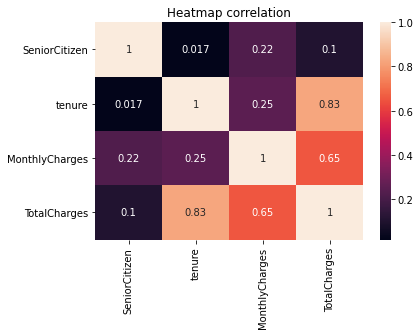

In [4]:
import matplotlib.pyplot as mpp  
 

mpp.title('Heatmap correlation')
sns.heatmap(data.corr().abs(),annot=True) # Displaying the Heatmap

It can be deduced that tenure and charges have shown collinearity, which is a result of them being proportionate in nature. As the time spent with the company increases, the total amount paid does too. It is a logical relation and high intercorrelations are not present for independent variables so won't require treatment. 

In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1  #Identifying Outliers with Interquartile Range (IQR)
print(IQR)

SeniorCitizen        0.0000
tenure              46.0000
MonthlyCharges      54.3500
TotalCharges      3393.2875
dtype: float64


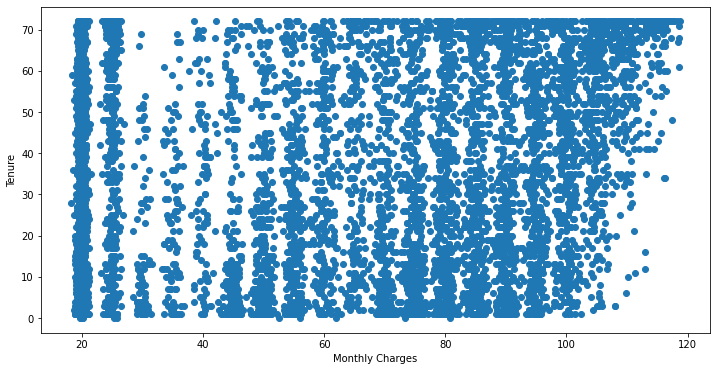

In [6]:
fig, ax = mpp.subplots(figsize=(12,6))
ax.scatter(data['MonthlyCharges'], data['tenure'])
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Tenure')
mpp.show()

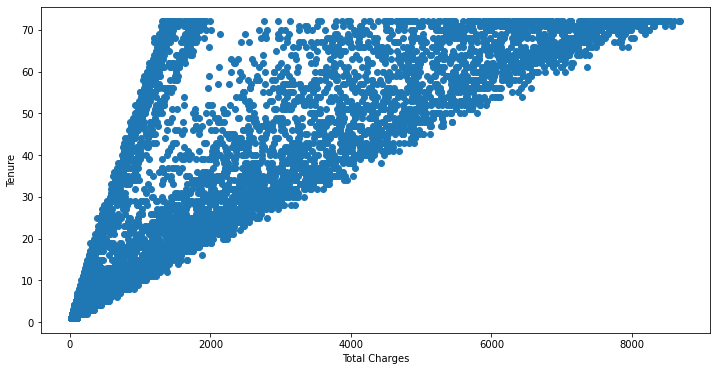

In [7]:
fig, ax = mpp.subplots(figsize=(12,6))
ax.scatter(data['TotalCharges'], data['tenure'])
ax.set_xlabel('Total Charges')
ax.set_ylabel('Tenure')
mpp.show()

There is no valid range for TotalCharges and MonthlyCharges, they can fall in a wide range of values, upon the visualisation of scatterplot it can be seen that with respect to tenure both the features can be seen having minute to no deviations from dataset range.

As almost all the columns include categorical variables, it is necessary to convert them into equivalent numerical values as a part of preprocessing data 

In [8]:
s= (data.dtypes=='object')
cat_cols=list(s[s].index)  #storing categorical variables
print(cat_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


As it can be seen that 90% of the behavioral variables are categorical in nature, it won't be fruitful to drop the columns as significant data will be lost. One hot encoding would seen futile too as a lot of columns would generate from a single column and increase the dataframe size unnecessarily. The best option in this case in to use Label encoding which assigns integer values to each category.

In [9]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    Mylabel = LabelEncoder()
    Mylabel.fit(list(data[col].values))
    data[col] = Mylabel.transform(data[col].values)

In [10]:
data.head() #reviewing the data after encoding categorical to numeric

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [11]:
data = data.drop(['customerID'], axis = 1)  #dropping customer id as it is insignificant for prediction

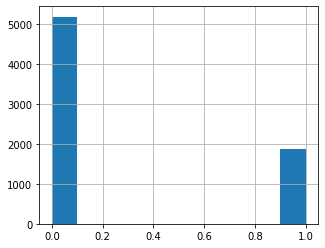

In [12]:
data['Churn'].hist(figsize=(5,4))
mpp.show() 

The dataset is highly imbalanced with the target class having a 70-30 distribution. To prevent this imbalance from effecting model insuffieciency, we will perform resampling.

In [13]:
no  = data[data['Churn']==0]   
yes = data[data['Churn']==1]  
from sklearn.utils import resample
data_upsampled = resample(yes, replace = True, n_samples = 5000) 

data = pd.concat([no, data_upsampled])

from sklearn.utils import shuffle
data = shuffle(data) # shuffling for random order encounter


With a balanced dataset, it is now important to select the features decisive in determining Churn.

In [14]:
data.corr().abs()['Churn'].sort_values(ascending = False)

Churn               1.000000
Contract            0.482989
tenure              0.413883
OnlineSecurity      0.345195
TechSupport         0.331095
TotalCharges        0.240568
MonthlyCharges      0.222270
PaperlessBilling    0.221252
OnlineBackup        0.218172
DeviceProtection    0.206812
Dependents          0.196725
Partner             0.176173
SeniorCitizen       0.158440
PaymentMethod       0.126525
InternetService     0.062858
StreamingMovies     0.050430
StreamingTV         0.045106
MultipleLines       0.036531
gender              0.010943
PhoneService        0.008733
Name: Churn, dtype: float64

We can see that the columns InternetService, MultipleLines, StreamingMovies, StreamingTV, PhoneService, gender have very less role in determining Churn status, hence it'll be beneficial to consider the more related features and not consider these.

In [18]:
X = data[['Contract', 'tenure', 'TechSupport',  'PaperlessBilling',
        'SeniorCitizen', 'MonthlyCharges', 'OnlineSecurity', 'TotalCharges',
       'PaymentMethod', 'Partner', 'PhoneService','DeviceProtection', 'Dependents', 'OnlineBackup']] #relevant columns
y = data['Churn'] #target class

In [19]:
#splitting into training and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [20]:
print(X_train.shape) #checking if splitted prpoerly
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(8139, 14)
(2035, 14)
(8139,)
(2035,)


In [21]:
X_train.head()

,Contract,tenure,TechSupport,PaperlessBilling,SeniorCitizen,MonthlyCharges,OnlineSecurity,TotalCharges,PaymentMethod,Partner,PhoneService,DeviceProtection,Dependents,OnlineBackup
627,1,66,0,0,1,104.6,0,6819.45,1,1,1,2,0,2
685,0,1,2,1,0,49.9,0,49.90,2,0,1,0,0,0
6498,0,1,0,1,0,82.3,0,82.30,2,0,1,2,0,2
104,2,68,2,1,0,110.0,0,7611.85,0,1,1,2,0,2
2716,0,19,0,0,0,44.9,0,839.65,3,1,1,0,0,0


With the requirment to deal with interdependent features and a few missing values, it is best to use XGBoost for fast and accurate predictions.

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'auc',
                    use_label_encoder=False, 
                    objective = 'binary:logistic', random_state = 1)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [23]:
y_pred = xgb.predict(X_valid)

from sklearn.metrics import classification_report
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1060
           1       0.81      0.89      0.85       975

    accuracy                           0.85      2035
   macro avg       0.85      0.85      0.85      2035
weighted avg       0.85      0.85      0.85      2035



The model has an accuracy of 85% as shown in the classification report. The f1-score is a great performance measure as it takes into account both false positives and false negatives. If more data used is used in model training and fine tuned parameters, then the model would be able to produce even better results.

array([[<AxesSubplot:title={'center':'Month-to-month'}>,
        <AxesSubplot:title={'center':'One year'}>],
       [<AxesSubplot:title={'center':'Two year'}>, <AxesSubplot:>]],
      dtype=object)

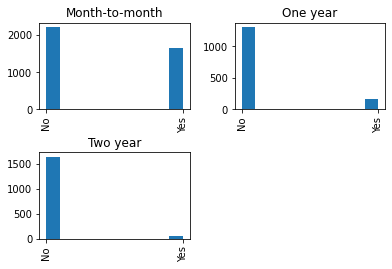

In [24]:
org_data.hist(by='Contract',
       column='Churn')

As Churn is dependant most on Contract, we have plotted churn status against every Contract category.
This relation is valid as some plans may prove beneficial and make the users stay while others may be unsatisfactory and be the reason for potential customer churn.
From above data, it can be seen that most people opting for Month-to-month plan are likely to churn away. As this plan accounts for 55% of customer usage, it is in company's best interest if they provide offers and better services for this plan.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

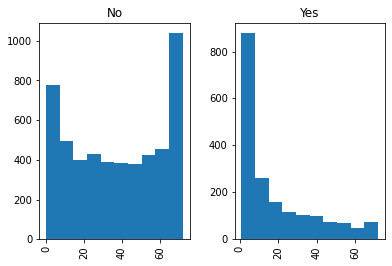

In [25]:
org_data.hist(by='Churn',
       column='tenure')

When plotted against Tenure which is a decisive measure to determine whether the company is able to retain it's customers in the long run, it is revealed that customers with a shorter tenure are most likely to become a churn. For this issue, sustainable deals for new customers and trials. Personal interaction can be helpful as well.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

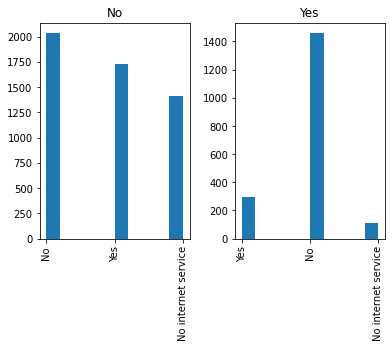

In [26]:
org_data.hist(by='Churn',
       column='OnlineSecurity')

It is seen that customers with no Online Security are likely to drop out of service, to prevent this company should introduce combo offers or complimentart Online Security with it's plans to provide a better experience to the customer and increase the chance of retention.

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

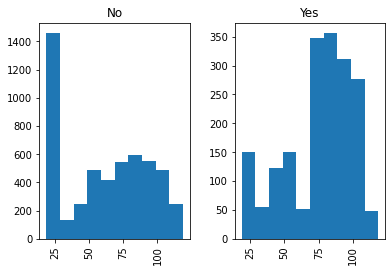

In [28]:
org_data.hist(by='Churn',
       column='MonthlyCharges')

As an obvious conclusion, customers getting charged high per month are likely to churn away, they should be assured of the benefits or be given proper information about how these deals if taken for a longer perios are beneficial.

To sum up the following deals can be provided to prevent potential churns:

i) Better prices and services for Month-to-month contract customers.
ii) New customers should be given personal consultation, better deals and free trials.
iii) Online Security is a must have in such a technologically advanced world. Combo offers at great prices or complimentary service should be provided.
iv) Instead of high monthly charges, customers should be educated about the cost benefits for the long term plans that would reduce their monthly charge while providing same services.

Assuming the actions have been implemented, their efficiency can be checked by:
Predicting the amount of potential churns who would be discontinuing their plan or would not renew in the coming month.
Then, taking these measure specifically for only those potential churns.
Comparing the actual churn with the already predicted churn. 